## Data Exploration: Feature Engineering for Multinomial Epilepsy Classification

### In this notebook, a variety of feature extraction approaches are explored, including:

1. Fourier Transform
2. Discrete Wavelet Transform
3. Shannon Entropy
4. Primary Component Analysis (PCA)



### Setup

In [1]:
import numpy as np
import pandas as pd
import util

### Data
We first parse and normalize our dataset.

In [2]:
X, y, ids, chunks = util.parse_data()
n = X.shape[0]
classes = np.unique(y)
num_chunks = np.unique(chunks).shape[0]

# Set up evaluation metrics
scoring = util.get_scoring_metrics(classes)

### Hurst and DFA

In [13]:
from FeatureExtractionAlgorithms import pfd, hurst, hfd

In [5]:
X_b = np.concatenate((np.apply_along_axis(pfd, 1, X).reshape(n, 1), np.apply_along_axis(hurst, 1, X).reshape(n, 1)), axis=1)

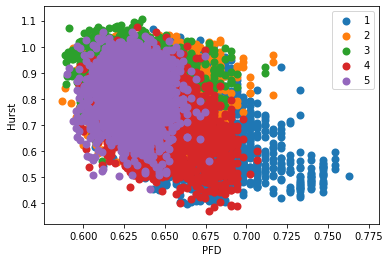

In [9]:
from matplotlib import pyplot as plt

plt.figure()
for c in classes:
    plt.scatter(X_b[y == c, 0], X_b[y == c, 1], linewidth=2, label=str(c))
plt.xlabel('PFD')
plt.ylabel('Hurst')
plt.legend()
plt.show()

In [19]:
X_c = np.concatenate((np.apply_along_axis(hurst, 1, X).reshape(n, 1), np.apply_along_axis(hfd, 1, X, Kmax=5).reshape(n, 1)), axis=1)

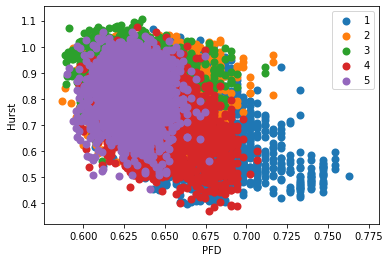

In [20]:
from matplotlib import pyplot as plt

plt.figure()
for c in classes:
    plt.scatter(X_b[y == c, 0], X_b[y == c, 1], linewidth=2, label=str(c))
plt.xlabel('PFD')
plt.ylabel('Hurst')
plt.legend()
plt.show()